In [10]:
import pandas as pd
from googletrans import Translator

In [236]:
# translating the data into english
# using google translate api
df = pd.read_csv("shuffled data.csv")
print(df.head())
test = pd.read_csv("shuffled test.csv")
print(test.head())

                                               hindi  complaint  category
0  गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...        NaN  accident
1  व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...        NaN  accident
2  पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...        NaN     theft
3  बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...        NaN      rape
4  पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...        NaN     theft
                                               hindi  complaint  category
0  मिर्ज़ापुर में नव विवाहिता की गला दबाकर हत्या, ...        NaN    murder
1  हरियाणा के बाउंसरों ने टोल कर्मी को मार डाला, ...        NaN    murder
2  मासूम आदर्श उपाध्याय (5) पुत्र संजय उपाध्याय अ...        NaN      rape
3  आज दिनांक 13.03.2023 को समय करीब 5.00 एएम पर ख...        NaN  accident
4  आज दिनांक 19.03.2023 को समय करीब 7.15 बजे सांय...        NaN  accident


In [12]:
def translate(data):
    translator = Translator()
    translations = {}
        #print(column)
       # print(unique)
    for element in data['hindi']:
            translations[element] = translator.translate(element).text
    data['complaint'] = data['hindi'].map(translations)
    return data

In [13]:
df= translate(df)
test = translate(test)

print(df.head())
print(test.head())

                                               hindi  \
0  गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...   
1  व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...   
2  पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...   
3  बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...   
4  पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...   

                                           complaint  category  
0  A car was hit from behind by a truck near vill...  accident  
1  The person told that he was going home on a bi...  accident  
2  Troubled by debt, a man along with his friend ...     theft  
3  The girl's mother told that a classmate of her...      rape  
4  Accused Pawan Kumar, a resident of Panchkula, ...     theft  
                                               hindi  \
0  मिर्ज़ापुर में नव विवाहिता की गला दबाकर हत्या, ...   
1  हरियाणा के बाउंसरों ने टोल कर्मी को मार डाला, ...   
2  मासूम आदर्श उपाध्याय (5) पुत्र संजय उपाध्याय अ...   
3  आज दिनांक 13.03.2023 को समय करीब 5.00 एएम पर ख

In [164]:
df.to_csv("translated data.csv",encoding="utf-8",index=False)
test.to_csv("translated test.csv",encoding="utf-8",index=False)

In [237]:
translated_data= pd.read_csv("translated data.csv")
translated_test = pd.read_csv("translated test.csv")


df['complaint'] = translated_data['complaint']
test['complaint'] = translated_test['complaint']

print(df.head())
print(test.head()) 

                                               hindi  \
0  गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...   
1  व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...   
2  पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...   
3  बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...   
4  पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...   

                                           complaint  category  
0  A car was hit from behind by a truck near vill...  accident  
1  The person told that he was going home on a bi...  accident  
2  Troubled by debt, a man along with his friend ...     theft  
3  The girl's mother told that a classmate of her...      rape  
4  Accused Pawan Kumar, a resident of Panchkula, ...     theft  
                                               hindi  \
0  मिर्ज़ापुर में नव विवाहिता की गला दबाकर हत्या, ...   
1  हरियाणा के बाउंसरों ने टोल कर्मी को मार डाला, ...   
2  मासूम आदर्श उपाध्याय (5) पुत्र संजय उपाध्याय अ...   
3  आज दिनांक 13.03.2023 को समय करीब 5.00 एएम पर ख

https://www.projectpro.io/recipes/do-text-classification

In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [239]:
# df= pd.read_csv('complaint with manual labels.csv')
df.head()

,hindi,complaint,category
0,गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...,A car was hit from behind by a truck near vill...,accident
1,व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...,The person told that he was going home on a bi...,accident
2,पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...,"Troubled by debt, a man along with his friend ...",theft
3,बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...,The girl's mother told that a classmate of her...,rape
4,"पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...","Accused Pawan Kumar, a resident of Panchkula, ...",theft


In [240]:
df['category'] = df.category.map({'rape': 3, 'murder': 2, 'accident':1, 'theft':0})
test['category'] = test.category.map({'rape': 3, 'murder': 2, 'accident':1, 'theft':0})


In [241]:
print(df.head())
df.tail()

                                               hindi  \
0  गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...   
1  व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...   
2  पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...   
3  बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...   
4  पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...   

                                           complaint  category  
0  A car was hit from behind by a truck near vill...         1  
1  The person told that he was going home on a bi...         1  
2  Troubled by debt, a man along with his friend ...         0  
3  The girl's mother told that a classmate of her...         3  
4  Accused Pawan Kumar, a resident of Panchkula, ...         0  


,hindi,complaint,category
347,गांव खरकडा (हांसी) से एक क्रूजर गाड़ी जिसमें 6...,A cruiser vehicle carrying 6 persons from vill...,1
348,शनिवार देर शाम को सेक्टर 14 में रहने वाले बजे ...,"Singh, a resident of Sector 14, died on Saturd...",2
349,मुकेश वासी चरखी दादरी अपनी पत्नी व बेटे के साथ...,Mukesh resident of Charkhi Dadri along with hi...,1
350,लड़की के परिवारवालों का कहना है कि आरोपी की भाभ...,The family members of the girl say that the si...,3
351,हरियाणा में सोनीपत के गोहाना में एक छात्रा के ...,"Gangrape case with a girl student in Gohana, S...",3


In [242]:
X_train, X_val, y_train, y_val = train_test_split(df['complaint'], df['category'], random_state=1)
vectorizer = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = vectorizer.fit_transform(X_train)
X_val_cv = vectorizer.transform(X_val)

In [243]:
Word_frequency = pd.DataFrame(X_train_cv.toarray(), columns=vectorizer.get_feature_names_out())
top_words = pd.DataFrame(Word_frequency.sum()).sort_values(0, ascending=False)
print(Word_frequency, '\n\n')
print("top words: ",top_words)

     10a  152d  16th  22nd  29th  aadhaar  abducted  abducting  absconded  \
0      0     0     0     0     0        0         0          0          0   
1      0     0     0     0     0        0         0          0          0   
2      0     0     0     0     0        0         0          0          0   
3      0     0     0     0     0        0         0          0          0   
4      0     0     0     0     0        0         0          0          0   
..   ...   ...   ...   ...   ...      ...       ...        ...        ...   
259    0     0     0     0     0        0         0          0          0   
260    0     0     0     0     0        0         0          0          0   
261    0     0     0     0     0        0         0          0          0   
262    0     0     0     0     0        0         0          0          0   
263    0     0     0     0     0        0         0          0          0   

     absconding  ...  years  yes  yesterday  ymca  young  younger  youth  \

In [244]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_val_cv)

In [245]:
print('Accuracy score for complaint Reviews model is: ', accuracy_score(y_val, predictions), '\n')

Accuracy score for complaint Reviews model is:  0.9204545454545454 



In [246]:
# testing on unseen data
# test= pd.read_csv('testdata.csv')
print(test.head())


                                               hindi  \
0  मिर्ज़ापुर में नव विवाहिता की गला दबाकर हत्या, ...   
1  हरियाणा के बाउंसरों ने टोल कर्मी को मार डाला, ...   
2  मासूम आदर्श उपाध्याय (5) पुत्र संजय उपाध्याय अ...   
3  आज दिनांक 13.03.2023 को समय करीब 5.00 एएम पर ख...   
4  आज दिनांक 19.03.2023 को समय करीब 7.15 बजे सांय...   

                                           complaint  category  
0  Newly married woman strangled to death in Mirz...         2  
1  Haryana's bouncers killed toll worker, Brijbhu...         2  
2  Innocent Adarsh ​​Upadhyay (5) son Sanjay Upad...         3  
3  Today, on 13.03.2023 at around 5.00 AM, the Vo...         1  
4  Today, on 19.03.2023, at around 7.15 pm, on Ji...         1  


In [247]:
test_complaint= vectorizer.transform(test['complaint'])
test_predictions = naive_bayes.predict(test_complaint)
print(test_predictions)


[2 2 2 1 1 0 3 2 1 0 3 0 0 2 1 3 1 1 3 3 1 1 3 1 3 0 0 1 2 0 2 0 3 1 2 0 0
 0 1 1 0 1 0 0 2 3 3]


In [248]:
print('Accuracy score for complaint Reviews model is: ', accuracy_score(test['category'], test_predictions), '\n')


Accuracy score for complaint Reviews model is:  0.851063829787234 



https://www.projectpro.io/article/10-nlp-techniques-every-data-scientist-should-know/415

In [249]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [250]:
# df= pd.read_csv('complaint with manual labels.csv')
df.head()

,hindi,complaint,category
0,गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...,A car was hit from behind by a truck near vill...,1
1,व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...,The person told that he was going home on a bi...,1
2,पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...,"Troubled by debt, a man along with his friend ...",0
3,बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...,The girl's mother told that a classmate of her...,3
4,"पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...","Accused Pawan Kumar, a resident of Panchkula, ...",0


In [251]:
tokenized=[]
for complaint in df['complaint']:
    tokenized.append(word_tokenize(complaint))
print(tokenized[0])


['A', 'car', 'was', 'hit', 'from', 'behind', 'by', 'a', 'truck', 'near', 'village', 'Bhalauth', '(', 'Rohtak', ')', '.', 'In', 'which', 'both', 'the', 'people', 'in', 'the', 'car', 'died', 'on', 'the', 'spot', '.']


In [252]:
import re

def clean_string(text):
    cleaned_text = re.sub(r"\\n", "", text) #to remove new line characters
    cleaned_text = re.sub(r"[^A-Za-z]", " ", cleaned_text) #to remove non alphabets
    cleaned_text= cleaned_text.strip().lower() #to convert into lower case
    return cleaned_text

In [253]:
cleaned_text=[]
for complaint in df['complaint']:
    cleaned_text.append(clean_string(complaint))
print(cleaned_text[0])

a car was hit from behind by a truck near village bhalauth  rohtak   in which both the people in the car died on the spot


In [254]:
tokenized=[]
for complaint in cleaned_text:
    tokenized.append(word_tokenize(complaint))
print(tokenized[0])

['a', 'car', 'was', 'hit', 'from', 'behind', 'by', 'a', 'truck', 'near', 'village', 'bhalauth', 'rohtak', 'in', 'which', 'both', 'the', 'people', 'in', 'the', 'car', 'died', 'on', 'the', 'spot']


In [ ]:
pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

In [187]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [255]:
lemmatized=[]
for complaint in tokenized:
    c=[]
    for word in complaint:
        doc= nlp(word)
        for token in doc:
            c.append(token.lemma_)
    lemmatized.append(c)
print(lemmatized[0])


['a', 'car', 'be', 'hit', 'from', 'behind', 'by', 'a', 'truck', 'near', 'village', 'bhalauth', 'rohtak', 'in', 'which', 'both', 'the', 'people', 'in', 'the', 'car', 'die', 'on', 'the', 'spot']


In [256]:
from spacy.lang.en.stop_words import STOP_WORDS
stop_words= list(STOP_WORDS)
print(len(stop_words))
print(stop_words[:100])


326
['whatever', 'further', "'d", 'latter', 'because', 'five', 'used', 'do', 'both', 'get', 'on', 'say', 'anyway', 'make', 'were', 'everywhere', 'most', 'her', 'others', 'now', 'upon', 'might', 'really', 'all', 'throughout', 'via', 'of', 'there', 'several', 'nevertheless', 'he', 'keep', 'sometimes', 'somehow', 'then', 'ca', 'full', 'nothing', 'fifteen', 'hereafter', 'whereas', 'or', 'even', 'many', 'whenever', 'up', 'well', 'for', 'thence', 'will', 'hence', 'each', 'but', 'few', 'have', 'done', 'once', 'empty', 'twenty', 'wherein', 'eleven', 'behind', 'below', 'an', 'they', '‘ve', 'whole', 'this', 'still', 'wherever', 'thru', 'becoming', 'yet', 'we', 'third', 'it', 'less', '‘d', 'any', 'be', 'elsewhere', 'latterly', 'anyhow', 'does', 'onto', '’re', 'alone', 'though', 'whom', 'those', 'and', 'four', 'at', 'being', 'ever', 'none', 'part', 'has', 'afterwards', 'due']


In [257]:
stop_words_removed=[]
for complaint in lemmatized:
    c=[]
    for word in complaint:
        if word not in stop_words:
            c.append(word)
    stop_words_removed.append(c)
print(stop_words_removed[0])

['car', 'hit', 'truck', 'near', 'village', 'bhalauth', 'rohtak', 'people', 'car', 'die', 'spot']


In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['complaint'])

In [259]:
print(df['complaint'][0])

A car was hit from behind by a truck near village Bhalauth (Rohtak). In which both the people in the car died on the spot.


In [260]:
tf= pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
tf= tf.sort_values('TF-IDF', ascending=False)
print(tf.head(25))


              TF-IDF
car         0.420364
bhalauth    0.395230
behind      0.286088
truck       0.262099
both        0.247813
rohtak      0.238865
the         0.222037
spot        0.213841
hit         0.205057
people      0.193112
near        0.189150
which       0.186639
village     0.177478
died        0.174354
in          0.150594
from        0.148735
by          0.146067
on          0.112326
was         0.111559
pen         0.000000
pilgrimage  0.000000
pictures    0.000000
pickup      0.000000
pick        0.000000
photos      0.000000


In [ ]:
pip install gensim==3.4.0

In [261]:
from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize


In [262]:
complaint_text= df['complaint'][51]
keywords(complaint_text, lemmatize=True, scores= True)

[('delhi', 0.432316536983411),
 ('vehicles', 0.38992664187029497),
 ('police', 0.33600724098084955),
 ('mode', 0.2965639248027598)]

In [155]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [263]:
model= wv

In [264]:
from sklearn.metrics.pairwise import cosine_similarity
d1= cosine_similarity(model['king'].reshape(1, -1), model['queen'].reshape(1, -1))[0][0]
d2= cosine_similarity(model['king'].reshape(1, -1), model['walked'].reshape(1, -1))[0][0]
print(d1, d2)

0.6510957 0.06271608


In [265]:
import numpy as np

vectors=[]
for text in stop_words_removed:
    if text!=[] :
        temp=[]
        for word in text:
            try:
                temp.append(model[word])
            except:
                pass
        if temp!=[]:
            vectors.append(np.average(np.array(temp), axis=0))
        else:
            vectors.append(np.zeros(300, dtype= np.float64))
    else:
        vectors.append(np.zeros(300, dtype= np.float64))


print(vectors[0])


[ 1.24457464e-01  2.29220912e-02  2.19862200e-02  5.24359792e-02
  2.90934253e-03 -4.16802317e-02  2.72759330e-02 -1.36555985e-01
  1.59257680e-01  1.14203557e-01  1.18679471e-01 -9.93923619e-02
 -1.09781899e-01 -4.60171178e-02 -6.01535365e-02 -2.72352435e-02
 -9.57217738e-02  8.19227397e-02  3.92795131e-02 -4.18701172e-02
 -1.82562936e-02 -2.49159075e-02 -8.00645649e-02 -1.09015573e-02
  1.29743785e-01 -1.46430120e-01 -8.74294713e-02  9.44010392e-02
  1.56222880e-01 -1.12820096e-01 -8.01730677e-02  3.01649310e-02
 -7.16688335e-02 -5.64236101e-03 -7.49715194e-02 -2.15352383e-02
  9.58387554e-02 -2.58992519e-02 -8.14954937e-02  4.68343087e-02
 -1.06743705e-02 -7.09906667e-02  1.29692927e-01 -3.23215052e-02
 -1.41760930e-01 -2.77167428e-02 -6.19269460e-02  1.32242842e-02
  9.08610001e-02  2.24619973e-02 -7.48155415e-02  1.60427511e-01
  1.57931864e-01 -3.38541679e-02 -8.87044296e-02 -8.77278671e-02
 -1.30242240e-02  1.27939865e-01  3.75094935e-02 -5.24902344e-02
  4.78108712e-02 -3.89404

In [266]:
vectors[0].shape

(300,)

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score


In [268]:
X_train, X_val, y_train, y_val = train_test_split(vectors, df['category'], test_size=0.1, random_state=1)


In [269]:
df

,hindi,complaint,category
0,गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...,A car was hit from behind by a truck near vill...,1
1,व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...,The person told that he was going home on a bi...,1
2,पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...,"Troubled by debt, a man along with his friend ...",0
3,बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...,The girl's mother told that a classmate of her...,3
4,"पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...","Accused Pawan Kumar, a resident of Panchkula, ...",0
...,...,...,...
347,गांव खरकडा (हांसी) से एक क्रूजर गाड़ी जिसमें 6...,A cruiser vehicle carrying 6 persons from vill...,1
348,शनिवार देर शाम को सेक्टर 14 में रहने वाले बजे ...,"Singh, a resident of Sector 14, died on Saturd...",2
349,मुकेश वासी चरखी दादरी अपनी पत्नी व बेटे के साथ...,Mukesh resident of Charkhi Dadri along with hi...,1
350,लड़की के परिवारवालों का कहना है कि आरोपी की भाभ...,The family members of the girl say that the si...,3


In [270]:
clf= LogisticRegression().fit(X_train, y_train)
predictions= clf.predict(X_val)


In [271]:
accuracy_score(y_val, predictions)

0.9444444444444444

<AxesSubplot: >

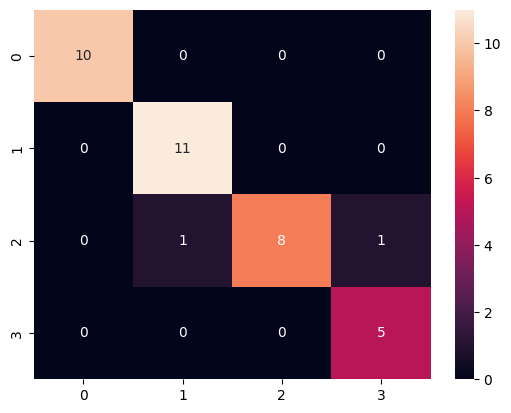

In [272]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d')

In [273]:
# testing on unseen data
print(test.head())


                                               hindi  \
0  मिर्ज़ापुर में नव विवाहिता की गला दबाकर हत्या, ...   
1  हरियाणा के बाउंसरों ने टोल कर्मी को मार डाला, ...   
2  मासूम आदर्श उपाध्याय (5) पुत्र संजय उपाध्याय अ...   
3  आज दिनांक 13.03.2023 को समय करीब 5.00 एएम पर ख...   
4  आज दिनांक 19.03.2023 को समय करीब 7.15 बजे सांय...   

                                           complaint  category  
0  Newly married woman strangled to death in Mirz...         2  
1  Haryana's bouncers killed toll worker, Brijbhu...         2  
2  Innocent Adarsh ​​Upadhyay (5) son Sanjay Upad...         3  
3  Today, on 13.03.2023 at around 5.00 AM, the Vo...         1  
4  Today, on 19.03.2023, at around 7.15 pm, on Ji...         1  


In [274]:
test_complaint= test['complaint']
import numpy as np

testvectors=[]
for text in test_complaint:
    if text!=[] :
        temp=[]
        for word in text:
            try:
                temp.append(model[word])
            except:
                pass
        if temp!=[]:
            testvectors.append(np.average(np.array(temp), axis=0))
        else:
            testvectors.append(np.zeros(300, dtype= np.float64))
    else:
        testvectors.append(np.zeros(300, dtype= np.float64))


print(testvectors[0])
test_predictions= clf.predict(testvectors)

[-1.83953926e-01  1.11525550e-01 -1.40004102e-02  1.49628058e-01
 -7.49157593e-02  4.37919721e-02 -1.02165319e-01 -6.77203909e-02
 -4.08588946e-02  2.12093405e-02 -6.41096383e-02 -1.07645668e-01
 -2.16186076e-01  1.44977337e-02 -1.34530529e-01  9.50837284e-02
  8.79533589e-02  1.92979604e-01 -2.85644531e-02 -9.55463946e-03
 -2.66803503e-01 -3.27824727e-02  1.12990111e-01  9.07577667e-03
 -7.73370042e-02  1.94557682e-02 -2.78531313e-01  5.76341413e-02
 -4.16048765e-02 -3.54101881e-02  8.69694445e-03  2.49604583e-02
 -6.50160015e-02 -1.13347560e-01 -1.42034084e-01  9.88678187e-02
 -2.16588899e-01  1.36158124e-01 -6.61065876e-02  7.68018216e-02
 -2.13547703e-02 -5.37591614e-02  7.57875815e-02  8.96350220e-02
  5.74783497e-02 -4.18601111e-02 -3.17556113e-02 -1.92575708e-01
 -9.95837525e-02  8.79938602e-02 -1.69055328e-01  2.43946210e-01
 -2.62918361e-02  2.38942847e-01  5.66742271e-02  1.21809594e-01
 -1.66636527e-01 -1.00949228e-01  4.94610844e-03 -1.72088996e-01
 -1.42061770e-01 -5.62902

In [277]:
print(list(test['category']))
print(test_predictions)

[2, 2, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 0, 2, 1, 3, 1, 1, 0, 3, 0, 0, 3, 1, 3, 0, 0, 1, 2, 0, 2, 0, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 3, 3]
[0 2 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2
 0 0 0 0 0 0 0 2 0 0]


In [278]:
print(accuracy_score(test['category'], test_predictions))

0.3829787234042553


In [279]:
# import random forest classifier, decision tree classifier and accuracy score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [280]:
# use decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)
print('Accuracy score for decision tree model is: ', accuracy_score(y_val, dt_pred), '\n')

Accuracy score for decision tree model is:  0.6944444444444444 



<AxesSubplot: >

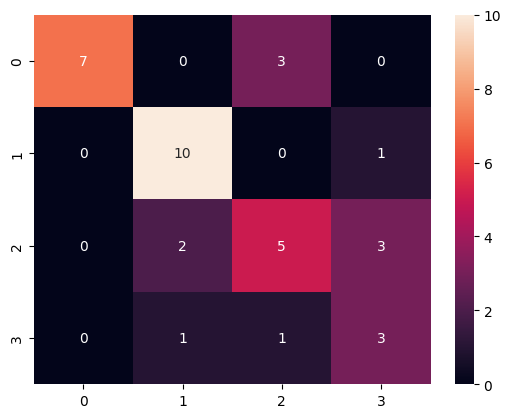

In [281]:
sns.heatmap(confusion_matrix(y_val, dt_pred), annot=True, fmt='d')

In [282]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
print('Accuracy score for random forest model is: ', accuracy_score(y_val, rf_pred), '\n')


Accuracy score for random forest model is:  0.9166666666666666 



https://www.datacamp.com/tutorial/text-classification-python


In [122]:
# data= pd.read_csv('complaint with manual labels.csv')

<AxesSubplot: >

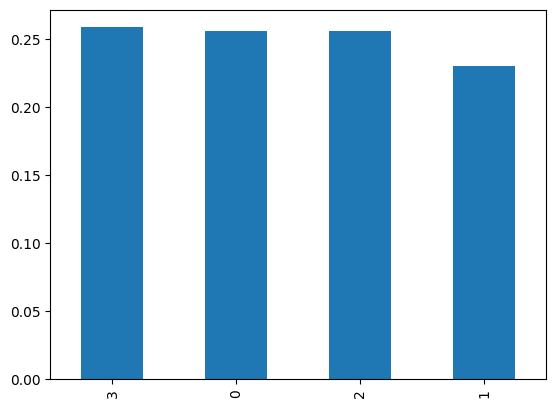

In [283]:
# check target balance
data= df
data['category'].value_counts(normalize = True).plot.bar()

In [284]:
# text preprocessing




# download nltk

# import nltk

# nltk.download('all')




# create a list text

text = list(data['complaint'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




corpus = []




for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

data['text'] = corpus

data.head()

,hindi,complaint,category,text
0,गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...,A car was hit from behind by a truck near vill...,1,car hit behind truck near village bhalauth roh...
1,व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...,The person told that he was going home on a bi...,1,person told going home bicycle white car came ...
2,पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...,"Troubled by debt, a man along with his friend ...",0,troubled debt man along friend looted girlfrie...
3,बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...,The girl's mother told that a classmate of her...,3,girl mother told classmate son tried rape lunc...
4,"पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...","Accused Pawan Kumar, a resident of Panchkula, ...",0,accused pawan kumar resident panchkula present...


In [285]:
# Create Feature and Label sets

X = data['text']

y = data['category']




# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=123)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_val.shape)

Training Data : (316,)
Testing Data :  (36,)


In [286]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(316, 1943)

In [287]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_val_cv = cv.transform(X_val)




# generate predictions

predictions = lr.predict(X_val_cv)

predictions

array([2, 3, 3, 0, 1, 0, 2, 3, 0, 2, 1, 0, 3, 2, 3, 2, 2, 0, 3, 2, 0, 1,
       2, 3, 2, 2, 0, 2, 1, 0, 0, 3, 0, 2, 0, 1], dtype=int64)

In [288]:
# confusion matrix

import pandas as pd

from sklearn import metrics

mat = pd.DataFrame(metrics.confusion_matrix(y_val,predictions))

mat

,0,1,2,3
0,11,0,0,0
1,0,5,0,0
2,0,0,9,1
3,0,0,3,7


In [289]:
accuracy_score(y_val, predictions)

0.8888888888888888

In [290]:
# test on unseen data
test_predictions= lr.predict(cv.transform(test['complaint']))
print(list(test['category']))
print(test_predictions)


[2, 2, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 0, 2, 1, 3, 1, 1, 0, 3, 0, 0, 3, 1, 3, 0, 0, 1, 2, 0, 2, 0, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 3, 3]
[2 2 2 1 1 0 2 2 1 0 3 0 0 2 1 3 1 1 0 3 1 1 3 1 3 1 0 1 2 0 2 0 3 1 2 0 0
 0 1 1 0 1 0 0 2 3 3]


In [291]:
accuracy_score(test['category'], test_predictions)

0.851063829787234

https://stackabuse.com/text-classification-with-python-and-scikit-learn/

In [292]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
# nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords


In [293]:
print(df.head())

                                               hindi  \
0  गांव भालौठ (रोहतक) के पास एक कार को ट्रक ने पी...   
1  व्यक्ति ने बताया वह साइकिल पर घर जा रहा था कि ...   
2  पंचकूला में कर्जे से परेशान हो क्र एक आदमी ने ...   
3  बच्ची की मां ने बताया कि उसकी बेटा के एक सहपाठ...   
4  पंचकुला का रहना वाला आरोपी पवन कुमार, (जो वर्त...   

                                           complaint  category  \
0  A car was hit from behind by a truck near vill...         1   
1  The person told that he was going home on a bi...         1   
2  Troubled by debt, a man along with his friend ...         0   
3  The girl's mother told that a classmate of her...         3   
4  Accused Pawan Kumar, a resident of Panchkula, ...         0   

                                                text  
0  car hit behind truck near village bhalauth roh...  
1  person told going home bicycle white car came ...  
2  troubled debt man along friend looted girlfrie...  
3  girl mother told classmate son tried rape l

In [294]:
x= df['complaint']
y= df['category']


In [295]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [296]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [297]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [298]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [300]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [301]:
y_pred = classifier.predict(X_val)


In [302]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[13  0  0  0]
 [ 0 18  0  0]
 [ 1  2 16  3]
 [ 0  0  1 17]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.90      1.00      0.95        18
           2       0.94      0.73      0.82        22
           3       0.85      0.94      0.89        18

    accuracy                           0.90        71
   macro avg       0.90      0.92      0.91        71
weighted avg       0.91      0.90      0.90        71

0.9014084507042254


In [305]:
# test on unseen data
test_predictions= classifier.predict(tfidfconverter.transform(test['complaint']))
print(list(test['category']))
print(test_predictions)


[2, 2, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 0, 2, 1, 3, 1, 1, 0, 3, 0, 0, 3, 1, 3, 0, 0, 1, 2, 0, 2, 0, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 3, 3]
[2 2 2 1 1 0 2 2 1 0 3 0 0 2 1 3 1 1 0 3 1 1 3 1 2 0 0 1 2 1 2 0 3 1 2 0 0
 0 1 1 0 1 0 0 2 3 3]


In [306]:
print(accuracy_score(test['category'], test_predictions))

0.8297872340425532


https://realpython.com/python-keras-text-classification/

In [ ]:
pip install keras==2.6


In [307]:
import tensorflow.keras as keras
# from keras.models import Sequential
# from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [308]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                3350      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________


In [310]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=10)

In [ ]:
from keras.backend import clear_session
clear_session()

https://www.kaggle.com/code/heeraldedhia/text-classification-nlp

In [15]:
import numpy as np
import pandas as pd 

import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

In [71]:
# data = pd.read_csv('complaint with manual labels.csv')
data= df
display(data.shape) 

(352, 3)

In [72]:
data.columns

Index(['hindi', 'complaint', 'category'], dtype='object')

In [73]:
data["category"].value_counts()

rape        91
theft       90
murder      90
accident    81
Name: category, dtype: int64

In [74]:
data["category"].value_counts()/data.shape[0] 

rape        0.258523
theft       0.255682
murder      0.255682
accident    0.230114
Name: category, dtype: float64

In [ ]:
pip install --upgrade nbformat


In [75]:
fig = go.Figure([go.Bar(x=data['category'].value_counts().index, y=data['category'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Complaint",
    xaxis_title="Complaints",
    yaxis_title="Values")
fig.show()

In [76]:
data['category'] = data.category.map({'rape': 3, 'murder': 2, 'accident':1, 'theft':0}) # relevant is 1, not-relevant is 0 
data = data[["complaint","category"]] # taking text input and output variable as relevance
data = data[:1000]
data.shape

(352, 2)

In [77]:
data.head()


,complaint,category
0,A car was hit from behind by a truck near vill...,1
1,The person told that he was going home on a bi...,1
2,"Troubled by debt, a man along with his friend ...",0
3,The girl's mother told that a classmate of her...,3
4,"Accused Pawan Kumar, a resident of Panchkula, ...",0


In [78]:
data['complaint'][0]

'A car was hit from behind by a truck near village Bhalauth (Rohtak). In which both the people in the car died on the spot.'

In [79]:
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ") 
    doc = doc.replace("-", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])    
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [80]:
data['complaint'] = data['complaint'].apply(clean)
data.head()

,complaint,category
0,car hit truck near village people car died spot,1
1,person told going home bicycle white car came ...,1
2,troubled debt man friend looted girlfriend s h...,0
3,girl s mother told classmate son tried rape lu...,3
4,accused pawan kumar resident presently residin...,0


In [81]:
docs = list(data['complaint'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [82]:
X = docs 
y = data['category']
print(X.shape, y.shape)

(352, 1818) (352,)


In [83]:
fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each complaint",
    xaxis_title="Complaints",
    yaxis_title="Values")
fig.show()

In [84]:
SEED=246
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(316, 1818) (316,)
(36, 1818) (36,)


In [91]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 14.5 ms

Training Accuracy score: 0.9968354430379747
Testing Accuracy score: 0.75


In [92]:
#testing on unseen data
# test = pd.read_csv('testdata.csv')
test['category'] = test.category.map({'rape':3, 'murder':2,'accident':1, 'theft':0}) # relevant is 1, not-relevant is 0 
test['complaint'] = test['complaint'].apply(clean)
docs = list(test['complaint'])
tfidf_vectorizer_vectors = tfidf_vectorizer.transform(docs)
docs = tfidf_vectorizer_vectors.toarray()
testX = docs 
testy = test['category']
print(testX.shape, testy.shape)

(47, 1818) (47,)


In [93]:
test_pred = gnb.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))



Testing Accuracy score: 0.7021276595744681


In [94]:
print(classification_report(y_test, y_pred_test, target_names=['rape', 'murder', 'accident', 'rape']))

              precision    recall  f1-score   support

        rape       0.78      0.78      0.78         9
      murder       1.00      0.75      0.86         8
    accident       0.60      0.67      0.63         9
        rape       0.73      0.80      0.76        10

    accuracy                           0.75        36
   macro avg       0.78      0.75      0.76        36
weighted avg       0.77      0.75      0.75        36



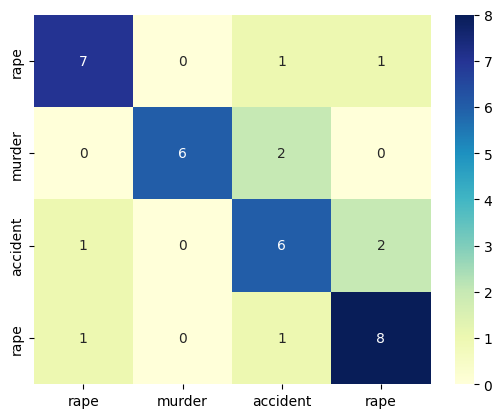

In [95]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder', 'accident', 'rape'], 
                        index=['rape', 'murder', 'accident', 'rape'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [36]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: multiclass format is not supported

In [96]:
print(classification_report(testy, test_pred, target_names=['rape', 'murder', 'accident', 'theft']))
print(accuracy_score(testy, test_pred))

              precision    recall  f1-score   support

        rape       0.92      0.65      0.76        17
      murder       0.69      1.00      0.81        11
    accident       0.56      0.50      0.53        10
       theft       0.60      0.67      0.63         9

    accuracy                           0.70        47
   macro avg       0.69      0.70      0.68        47
weighted avg       0.73      0.70      0.70        47

0.7021276595744681


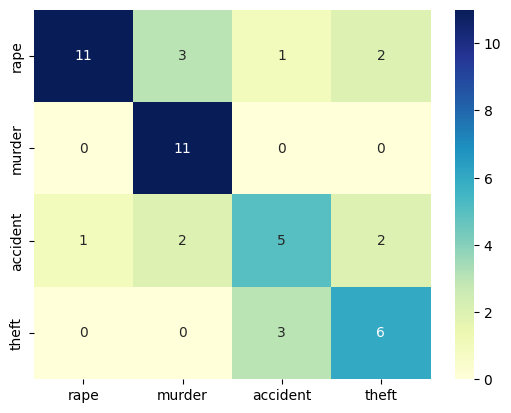

In [97]:
cm = confusion_matrix(testy, test_pred)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder', 'accident', 'theft'], 
                        index=['rape', 'murder', 'accident', 'theft'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [98]:
probs = gnb.predict_proba(testX)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testy, test_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: multiclass format is not supported

In [99]:
mnb = MultinomialNB() 
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 31.2 ms
Wall time: 12.7 ms

Training Accuracy score: 0.990506329113924
Testing Accuracy score: 0.8055555555555556


In [100]:
test_pred = mnb.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8085106382978723


In [101]:
print(classification_report(y_test, y_pred_test, target_names=['rape', 'murder', 'accident', 'theft']))

              precision    recall  f1-score   support

        rape       1.00      0.89      0.94         9
      murder       0.89      1.00      0.94         8
    accident       0.80      0.44      0.57         9
       theft       0.64      0.90      0.75        10

    accuracy                           0.81        36
   macro avg       0.83      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36



In [102]:
print(classification_report(testy, test_pred, target_names=['rape', 'murder', 'accident', 'theft']))
print(accuracy_score(testy, test_pred))

              precision    recall  f1-score   support

        rape       0.92      0.65      0.76        17
      murder       0.73      1.00      0.85        11
    accident       0.89      0.80      0.84        10
       theft       0.73      0.89      0.80         9

    accuracy                           0.81        47
   macro avg       0.82      0.83      0.81        47
weighted avg       0.83      0.81      0.80        47

0.8085106382978723


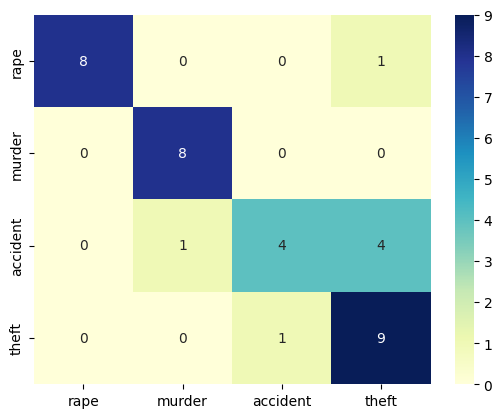

In [103]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder', 'accident', 'theft'], 
                        index=['rape', 'murder', 'accident', 'theft'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

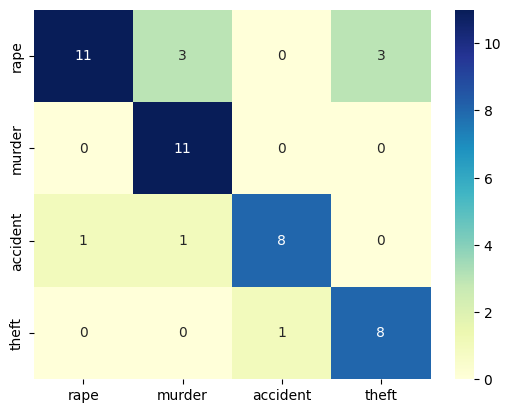

In [104]:
cm = confusion_matrix(testy, test_pred)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder', 'accident', 'theft'], 
                        index=['rape', 'murder', 'accident', 'theft'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [106]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 62.5 ms
Wall time: 131 ms

Training Accuracy score: 0.9936708860759493
Testing Accuracy score: 0.8333333333333334


In [107]:
test_pred = lr.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8297872340425532


In [108]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 13.5 ms

Training Accuracy score: 0.9968354430379747
Testing Accuracy score: 0.8611111111111112


In [109]:
test_pred = svc.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8723404255319149


In [110]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 46.9 ms
Wall time: 35.4 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.7222222222222222


In [111]:
test_pred = dt.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.6170212765957447


In [112]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9968354430379747
Testing Accuracy score: 0.8611111111111112


In [113]:
test_pred = vc.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8085106382978723
